<h1>Projekt Swingboat</h1>

## 1 Lernziele
Die Studierenden lernen
- eine Schiffschaukel durch ein physikalisches Modell mathematisch zu beschreiben
- exakte Lösungen von Schwingungsdifferenzialgleichungen zu berechnen
- Näherungslösungen für Differenzialgleichungen mit dem Polygonzugverfahren von Euler zu berechnen
- Schaubilder für Lösungen von Differenzialgleichungen zu erstellen
- Animationen zu erstellen, die den Bewegungsablauf in Echtzeit simulieren 

## 2 Bibliotheken
Eines der Grundkonzepte von Python ist die Verwendung spezieller Bibliotheken für spezielle Aufgaben.
Für Berechnungen mit Vektoren und Matrizen wird meistens die Bibliothek `numpy` verwendet und für Grafiken die Bibliothek `matplotlib`.
Die Bibliothek `numpy` und das API `pyplot` der `matplotlib` orientieren sich an der Syntax von Matlab.
Für `pyplot` ist die Abkürzung `plt` und für `numpy` die Abkürzung `np` üblich.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Die Funktion `IFrame()` wird zum Anzeigen von Grafiken aus Dateien verwendet.

In [2]:
from IPython.display import IFrame, Image, HTML

Für symbolische Berechnungen steht die Bibliothek `sympy` zur Verfügung.

In [3]:
import sympy as sp
sp.init_printing()

## 3 Aufgabenstellung
Die Abbildung zeigt die Skizze einer Schiffschaukel.

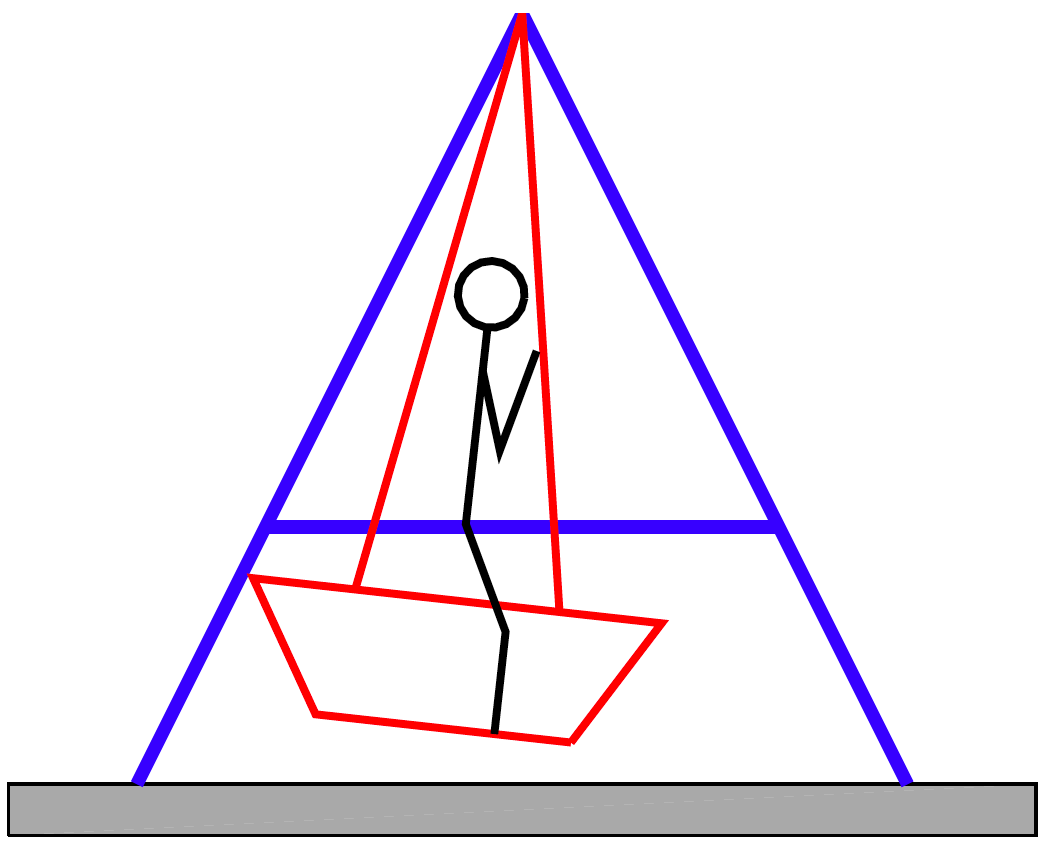

In [4]:
Image('swingboat_fig_1.png', width=1045/4, height=843/4)

Die Schaukel in Form eines Schiffchens ist drehbar an einem Gestell befestigt, so dass Schwingbewegungen und sogar Überschläge möglich sind.

Bei Fahrgeschäften auf Volksfesten erfolgt der Antrieb häufig durch Muskelkraft und Schwerpunktsverlagerung.
Wir wollen in diesem Projekt jedoch nur Bewegungen untersuchen, die durch eine initiale Auslenkung und eine initiale Geschwindigkeit ausgelöst werden.

Reibungseffekte und Luftwiderstand führen dazu, dass die Schaukelbewegungen im Laufe der Zeit abklingen.

Die Aufgabenstellung besteht darin, für die Bewegung der Schiffschaukel ein mathematisches Modell zu entwickeln und die Bewegung zu simulieren.

## 4 Mathematisches Modell
Bei einem idealisierten Pendelmodell betrachtet man eine punktförmige Masse $m$, die im Abstand $l$ vom Drehpunkt $D$, durch eine masselose Stange befestigt ist.
Auf die Masse wirkt die Erdanziehungskraft mit Erdbeschleunigung $g$.
Oft spricht man in diesem Zusammenhang von einem mathematischen Pendel.

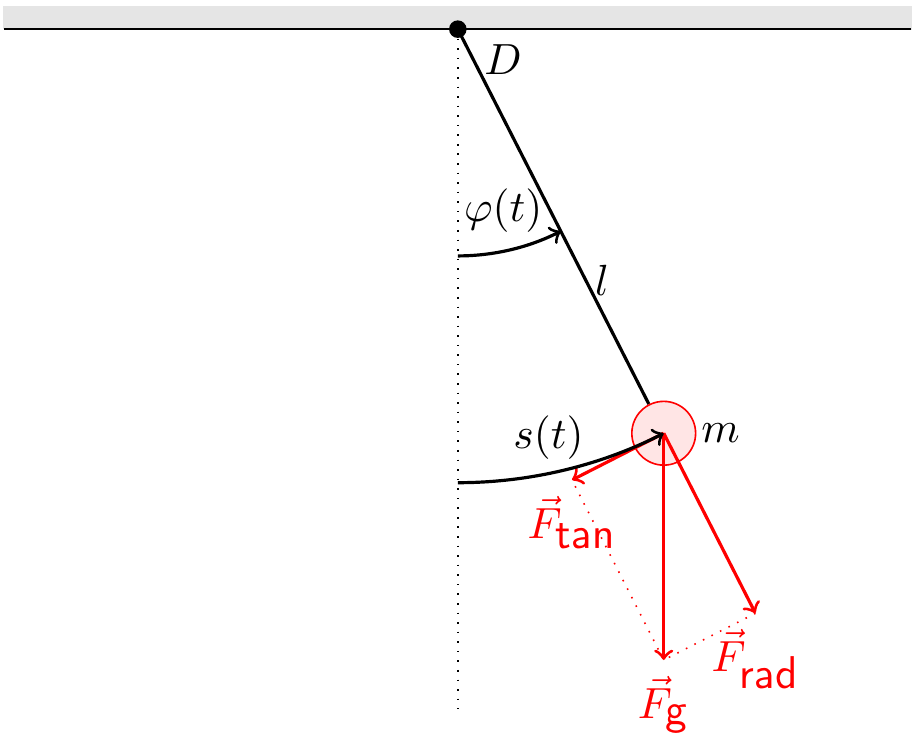

In [5]:
Image('swingboat_fig_2.png', width=916/3, height=740/3)

Wir betrachten nur den Spezialfall eines Kreispendels, bei dem Bewegungen nur innerhalb einer Ebene stattfinden.
Der allgemeine Fall, mit Bewegungen in alle Raumrichtungen, bezeichnet man als Kugelpendel.

Der zeitliche Verlauf der Bewegung lässt sich durch den Auslenkungswinkel $\varphi(t)$ beschreiben.
Der Auslenkungswinkel wird bezüglich der Ruhelage gemessen, wobei Auslenkungen gegen den Uhrzeigersinn, also in mathematisch positiver Richtung, mit positiven Winkeln und Auslenkungen im Uhrzeigersinn mit negativen Winkeln angegeben werden.

Es gibt verschiedene Möglichkeiten, Gleichungen für die Bewegung des mathematischen Pendels herzuleiten.
Wir betrachten die wirkenden Kräfte und verwenden das zweite Newtonsche Axiom.

### 4.1 Gewichtskraft
Die Erdbeschleunigung $g$ erzeugt bei der Masse $m$ eine Gewichtskraft

$$
	\left| \vec{F}_{\mbox{g}} \right| = m \, g \, .
$$

Die Gewichtskraft $\vec{F}_{\mbox{g}}$ wirkt senkrecht nach unten und besitzt eine
radiale Komponente $F_{\mbox{rad}}$ und eine tangentiale Komponente $F_{\mbox{tan}}$.
Für die Bewegung der Masse spielt die radiale Komponente keine Rolle, da sie von der Befestigung der Masse kompensiert wird.
Die tangentiale Komponente $F_{\mbox{tan}}$ erzeugt bei der Auslenkung um den Winkel $\varphi(t)$ eine Rückstellkraft.
Diese Rückstellkraft wirkt in entgegengesetzter Richtung zu der Bewegungsrichtung und verändert sich mit der Zeit:

$$
	F_{\mbox{tan}}(t) = - m \, g \, \sin (\varphi(t)) \, .
$$

### 4.2 Reibung
Die genaue Untersuchung von Reibungseffekten ist ein schwieriges Thema.
Wir betrachten ein vereinfachtes Modell für die Reibung, das sich für das mathematische Pendel bewährt hat.
Dabei gehen wir davon aus, dass die Reibung im wesentlichen negativ proportional zu der Geschwindigkeit der Masse ist:

$$
	F_{\mbox{fric}}(t) = -k \, v(t) \, .
$$

Dabei ist $k$ eine Konstante mit der Einheit $\frac{\mbox{kg}}{\mbox{s}}$.
Die Masse $m$ bewegt sich auf einer kreisförmigen Bahn.
Dem Auslenkungswinkel $\varphi(t)$ entspricht dabei ein Kreisbogen der Länge:

$$
	s(t) = l \, \varphi(t) \, .
$$

Somit ist die Geschwindigkeit der Masse proportional zur Winkelgeschwindigkeit
$\omega(t)$:

$$
	v(t) = \dot{s}(t) = l \, \dot{\varphi}(t) = l \, \omega(t) 
$$

und für die Reibungskraft gilt:

$$
	F_{\mbox{fric}}(t) = -k \, l \, \dot{\varphi}(t) \, .
$$

### 4.3 Zweites Newtonsches Axiom
Aus dem zweiten Newtonschen Axiom folgt, dass die Summe der wirkenden Kräfte bei einer beschleunigten Bewegung durch die Trägheitskraft kompensiert werden.
In unserem Fall bedeutet das:

$$
	F_{\mbox{tan}}(t) + F_{\mbox{fric}}(t) = m \, a(t) \, .
$$

Die Beschleunigung ergibt sich aus der Geschwindigkeit

$$
	a(t) = \dot{v}(t) = l \, \ddot{\varphi}(t) = l \, \dot{\omega}(t) \, ,
$$

wodurch wir insgesamt die Bewegungsgleichung   

$$
	m \, l \, \ddot{\varphi}(t) + k \, l \, \dot{\varphi}(t) + m \, g \, \sin (\varphi(t)) = 0
$$

erhalten.
Dabei handelt es sich um eine nicht lineare Differenzialgleichung zweiter Ordnung für die gesuchte Funktion $\varphi(t)$. 
Insgesamt lässt sich die Bewegung durch das Anfangswertproblem

\begin{equation}
	m \, l \ddot{\varphi}(t) + k \, l \, \dot{\varphi}(t) + m \, g \, \sin \left(\varphi(t)\right) = 0,
	\quad \varphi(0) = \varphi_0,
	\quad \dot{\varphi}(0) = \dot{\varphi}_0
   \label{EquationOfMotion}
\end{equation}

beschreiben, wobei $\varphi_0$ die Auslenkung und $\dot{\varphi}_0$ die Winkelgeschwindigkeit zum Startzeitpunkt $t_0=0$ bezeichnen.

## 5 Vorgehensweise
Die Vorgehensweise kann in den folgenden Schritten erfolgen:
- Exakte Lösung der linearisierten Differenzialgleichung
- Näherungslösungen mit dem Polygonzugverfahren von Euler
- Simulation und Animation in Echtzeit

### 5.1 Exakte Lösung der linearisierten Differenzialgleichung
Die Differenzialgleichung des Anfangswertproblems $\eqref{EquationOfMotion}$ ist nicht linear und somit nicht einfach analytisch lösbar.
Die Nichtlinearität wird durch den Ausdruck $\sin \left(\varphi(t)\right)$ verursacht.
Wenn wir nur Bewegungen mit kleinen Auslenkungswinkeln $\varphi$ betrachten, dann können wir die Näherung

$$
	\sin(\varphi) \approx \varphi
$$

verwenden und erhalten ein Anfangswertproblem mit einer linearen Differenzialgleichung:

\begin{equation}
	m \, l \ddot{\varphi}(t) + k \, l \, \dot{\varphi}(t) + m \, g \, \varphi(t) = 0,
	\quad \varphi(0) = \varphi_0,
	\quad \dot{\varphi}(0) = \dot{\varphi}_0 \, .
   \label{EquationOfMotionLinear}
\end{equation}

Für die Erdbeschleunigung wählen wir $g = 9.81 \, \frac{\mbox{m}}{\mbox{s}^2}$, für die Masse $m = 100 \, \mbox{kg}$, für die Länge $l = 2 \, \mbox{m}$ und für die Reibung $k = 25 \, \frac{\mbox{kg}}{\mbox{s}}$ 

In [6]:
# Erdbeschleunigung [m/s^2] 
g = 9.81 

# Masse [kg]
m = 100.0

# Länge des Pendels [m]
l = 2.0

# Reibung [kg/s]
k = 25.0

Bei den Anfangswerten müssen wir beachten, dass wir die linearisierte Differenzialgleichung nur für kleine Winkel verwenden können.
Wir wählen die Anfangsauslenkung $\varphi_0=0.1$, die Anfangsgeschwindigkeit $\dot{\varphi}_0 = 0$ und betrachten die Bewegung für eine Zeitdauer von $30$ Sekunden.

In [7]:
# Anfangsauslenkung
phi_0 = 0.1 

# Anfangsgeschwindigkeit
dotphi_0 = 0.0

# Zeitintervall
t0, t1 = 0.0, 30.0

<div class="alert alert-block alert-danger">
    
<b>Merke</b>
    
Informationen zum symbolischen Lösen von Differenzialgleichungen mit Python finden Sie in dem Jupyter Notebook `sympy_ode.ipynb` im Moodle-Kurs Python unter der Rubrik `Examples`. 
    
</div>

<div class="alert alert-block alert-info">
    
### Aufgabe 1

Bestimmen Sie die Lösung des Anfangswertproblems mit der linearisierten Differenzialgleichung und erstellen Sie ein Schaubild der Lösung.
</div>

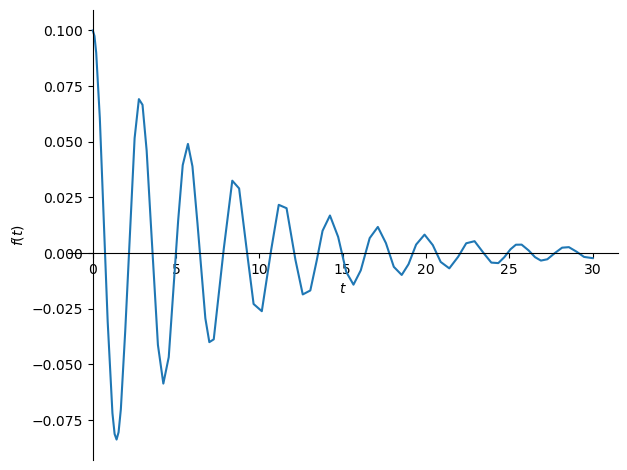

In [8]:
import sympy as sp

#symbol definieren
t = sp.Symbol('t')
#funktion definieren
phi = sp.Function('phi')(t)
#ableitungen
phip = sp.Derivative(phi) #erste ableitung
phipp = sp.Derivative(phip) #zweite ableitung
#funktion
ode = sp.Eq(m*l*phipp+k*l*phip+m*g*phi, 0)

#anfangswert problem
initconds = {phi.subs(t, 0): phi_0, phip.subs(t, 0): dotphi_0}
sol = sp.dsolve(ode,ics=initconds)

#print(sol)


#plot
sp.plot(sol.rhs,(t,t0,t1)) #rhs ist nur rechte seite






### 5.2 Näherungslösungen mit dem Polygonzugverfahren von Euler
Mit dem Polygonzugverfahren von Euler kann man numerische Näherungslösungen für das Anfangswertproblem $\eqref{EquationOfMotion}$ berechnen.
Die Nichtlinearität der Differenzialgleichung spielt dabei keine Rolle.
Somit können wir die numerischen Berechnungen auch für große Winkel und sogar für Überschläge der Schiffschaukel verwenden.
Dazu wählen wir jetzt die Anfangsgeschwindigkeit entsprechend groß: 

In [9]:
# Anfangsgeschwindigkeit
dotphi_0 = 5.0

<div class="alert alert-block alert-danger">
    
<b>Merke</b>
    
Informationen zum berechnen numerischer Näherungslösungen von Differenzialgleichungen mit Python finden Sie in dem Jupyter Notebook `euler.ipynb` im Moodle-Kurs Python unter der Rubrik `Examples`. 
    
</div>

Das Polygonzugverfahren von Euler funktioniert nur für Differenzialgleichungen oder Differenzialgleichungssysteme erster Ordnung.
Deshalb formulieren wir die Differenzialgleichung zweiter Ordnung aus dem Anfangswertproblem mithilfe von zwei Zustandsgrößen
$z_0(t) = \varphi(t)$
und
$z_1(t) = \dot{\varphi}(t)$
als System erster Ordnung: 

$$
	\begin{array}{lcl}
		\dot{z}_0(t) & = & z_1(t),\\ 
		\dot{z}_1(t) & = & - \frac{k}{m} \, z_1(t) - \frac{g}{l} \, \sin \left(z_0(t)\right).\\ 
	\end{array}
$$

Dieses Differenzialgleichungssystem realisieren wir als Funktion `swingBoatOde(...)`.
Obwohl die Berechnung der Ableitung der Zustandsgrößen $\dot{z}_0(t)$ und $\dot{z}_1(t)$ in unserem Fall gar nicht explizit von der Zeit $t$ abhängt, ist es üblich, der Funktion als erstes Eingabeargument die Zeit $t$ zu übergeben.
Das zweite Eingabeargument $z$ ist ein Vektor mit den beiden Zustandsgrößen $z_0(t)$ und $z_1(t)$.
Die Ausgabe besteht aus einem Vektor mit den Ableitungen der beiden Zustandsgrößen.

In [10]:
#
# Ergänzen Sie bitte hier die Python Befehle für die Funktion swingBoatOde()
#
def swingBoatOde(t,z):
    swingBoatOde = np.array([z[1], -(k/m)*z[1]-(g/l)*np.sin(z[0]) ])
    return swingBoatOde

Das Polygonzugverfahren von Euler realisieren wir als Funktion `swingBoatEuler(...)`.
Das Polygonzugverfahren berechnet, ausgehend von den Startwerten zum Startzeitpunkt, Schritt für Schritt neue Werte.
Die Schrittweite $h$ sollte möglichst optimal gewählt werden.
Bei einer großen Schrittweite sind die Näherungswerte ungenau.
Eine kleine Schrittweite führt zu langen Rechenzeiten.
Die Schrittweite übergeben wir der Funktion `swingBoatEuler(...)` als Eingabeargument. Damit können unterschiedliche Schrittweiten einfach ausprobiert werden.
Die Ausgabe der Funktion besteht aus den $t$-Werten, wobei die Differenz aufeinanderfolgende $t$-Werte jeweils der Schrittweite $h$ entspricht.
Außerdem werden zu jedem $t$-Wert die Werte der beiden Zustandsgrößen $z_0(t)$ und $z_1(t)$ als Ausgabewerte zurück gegeben.

In [11]:
#
# Ergänzen Sie bitte hier die Python Befehle für die Funktion swingBoatEuler()
#
def swingBoatEuler(t0, tn, h, z0):
    n = int((tn-t0)/h)
    t = np.linspace(t0,tn,n+1)
    z = np.zeros([len(z0),n+1])  #Matrix der zustände...len ist length
    z[:,0] = z0      #erste zustand wird kopiert
    for k in range(n):
        z[:,k+1] = z[:,k]+h*swingBoatOde(t[k],z[:,k])
    return t, z

<div class="alert alert-block alert-info">
    
### Aufgabe 2

Implementierten Sie die beiden Funktionen `swingBoatOde(...)` und `swingBoatEuler(...)`.
Berechnen Sie mit diesen Funktionen numerische Näherungswerte mit dem Polygonzugverfahren von Euler für das Anfangswertproblem und erstellen Sie ein Schaubild der Lösung.
Ermitteln Sie experimentell eine möglichst optimale Schrittweite.
</div>

t =  [0.0000e+00 1.0000e-03 2.0000e-03 ... 2.9998e+01 2.9999e+01 3.0000e+01]
z =  [[0.1        0.105      0.10999826 ... 6.34910425 6.34914031 6.34917604]
 [5.         4.99826032 4.99649667 ... 0.03606183 0.03572972 0.03539751]]


[Text(0.5, 0, '$x(t)$'), Text(0, 0.5, "$x'(t)$")]

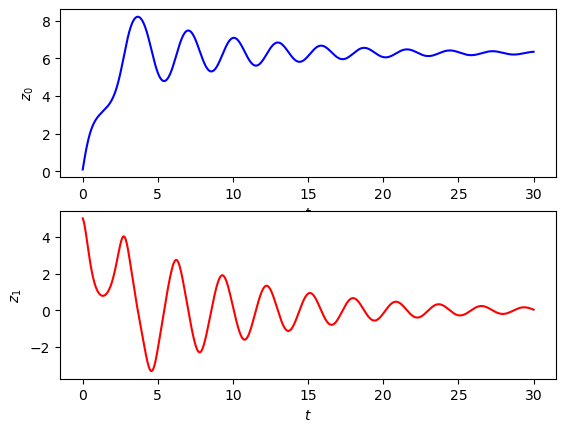

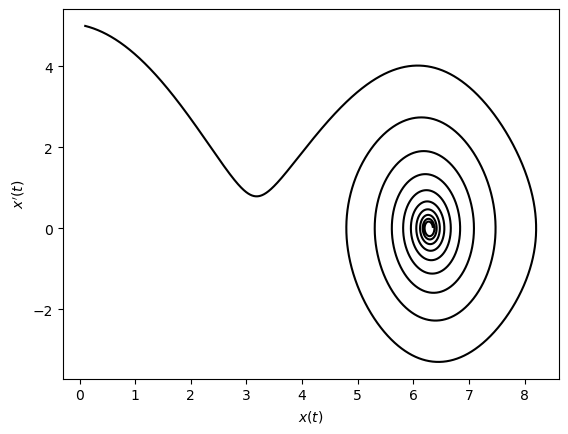

In [24]:
#
# Ergänzen Sie bitte hier die Python Befehle für die Aufgabe
#

tn = t1 #end zeit
h = 0.001
z0 = np.array([phi_0,dotphi_0])   #startwert besteht aus 2 zahlen
t, z = swingBoatEuler(t0,tn,h,z0)
print('t = ',t)
print('z = ',z)

#plot für zustand z0 und z1
fig, (ax1,ax2) = plt.subplots(2,1)  #2 graphen erstellt (2,1) 2 zeilen , 1 spalte
ax1.plot(t,z[0,:],'b')      #zustand z0  the : in z[0, :] z0 zu alle spalten 
ax1.set(xlabel='$t$', ylabel='$z_0$')
ax2.plot(t,z[1,:],'r')      #zustand z1
ax2.set(xlabel='$t$', ylabel='$z_1$')
#plt.savefig("euler2a.png")

#plot für phasen portrait
fig, ax = plt.subplots()
ax.plot(z[0,:],z[1,:],'k')
ax.set(xlabel='$x(t)$', ylabel="$x'(t)$")

### 5.3 Simulation und Animation in Echtzeit
Für die Animation der Schiffschaukel benötigen wir eine Visualisierung.
Grundplatte und Gestell der Schiffschaukel bleiben fest, das Schiffchen und die Person werden rotiert. 

In [18]:
def swingBoatDraw(phi):

    # clear figure
    fig.clf()
    
    # get axis of figure
    ax = fig.gca()
    
    # set axis properties
    ax.axis('equal')
    ax.axis('off')
    ax.axis([-3.0, 3.0, -3.2, 3.0])
    
    # Rotationsmatrix
    R = np.array([[np.cos(phi),-np.sin(phi)],[np.sin(phi),np.cos(phi)]])
 
    # Grundplatte der Schiffschaukel (ohne Rotation)
    ground = np.array([[-2.0,  2.0,  2.0, -2.0, -2.0],
                       [-3.2, -3.2, -3.0, -3.0, -3.2]])
    ax.fill(ground[0],ground[1],'darkgray')

    # Gestell der Schiffschaukel (ohne Rotation)
    frame = np.array([[-1.5, 0.0,  1.5, np.nan, -1.0,  1.0],
                      [-3.0, 0.0, -3.0, np.nan, -2.0, -2.0]])
    ax.plot(frame[0],frame[1],'b',linewidth=5)
    
    # Schiffchen der Schiffschaukel (mit Rotation)
    boat = R@np.array([[ 0.5,  0.8, -0.8, -0.5,  0.5, np.nan, -0.4, 0.0,  0.4],
                       [-2.8, -2.3, -2.3, -2.8, -2.8, np.nan, -2.3, 0.0, -2.3]])
    ax.plot(boat[0],boat[1],'r',linewidth=3)
    
    # Kopf der Person (mit Rotation)
    tt = np.linspace(0.0,2.0*np.pi,20)
    head = R@np.array([0.13*np.cos(tt),-1.1+0.13*np.sin(tt)])
    ax.plot(head[0],head[1],'k',linewidth=3)

    # Körper der Person (mit Rotation)
    body = R@np.array([[np.nan,   0.0,  0.0,  0.2,  0.2, np.nan,  0.0,  0.1,  0.2],
                       [np.nan, -1.23, -2.0, -2.4, -2.8, np.nan, -1.4, -1.7, -1.3]])
    ax.plot(body[0],body[1],'k',linewidth=3)

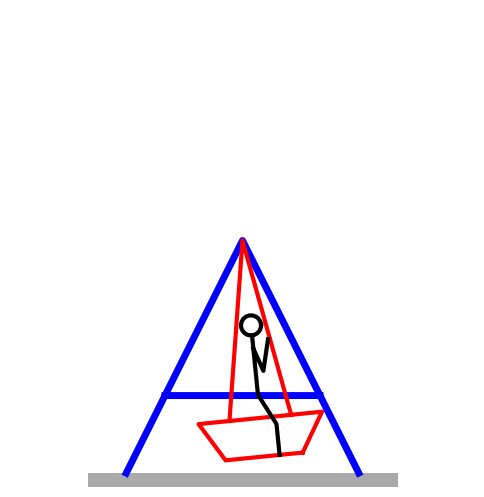

In [19]:
#
# Figure
#
fig, ax = plt.subplots(figsize=(6.0,6.2))
swingBoatDraw(0.1)

<div class="alert alert-block alert-info">
    
### Zusatzaufgabe

Erstellen Sie eine Animation, die die Schiffschaukel in Echtzeit simuliert.   
</div>

<div class="alert alert-block alert-danger">
    
<b>Merke</b>
    
Informationen zu Animationen mit Python finden Sie in dem Jupyter Notebook `animation.ipynb` im Moodle-Kurs Python unter der Rubrik `Examples`. 
    
</div>

In [15]:
if 'google.colab' in str(get_ipython()):
    print('IFrame() does not work with Google Colab')
else:
    display(IFrame('swingboat.gif', width=864/2, height=892/2))

Das Lösen der Zusatzaufgabe erfordert fundierte Kenntnisse im Umgang mit Python.
Die Zusatzaufgabe ist nur für diejenigen gedacht, die aus eigenem Interesse tiefer in die Materie einsteigen wollen!

Um verlässliche Näherungswerte mit dem Plygonzugverfahren von Euler zu berechnen benötigt man eine entsprechend kleine Schrittweite $h$.
Dadurch werden sehr viele Näherunsgwerte mit sehr kurzen Zeitabständen erzeugt. 
Für eine effiziente Animation in Echtzeit genügt es, nur ein paar wenige Näherungswerte pro Sekunde zu betrachten.

In [16]:
#
# Ergänzen Sie bitte hier die Python Befehle für die Zusatzaufgabe!
#
import matplotlib.animation












